## Build a Celsius to Farenheit AI model

$ y2=w*x + b $

#!pip install matplotlib

In [7]:
import torch 
import numpy as np
import torch.optim as optim

import matplotlib.pyplot as plt

## Data

In [8]:
## inputs
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]

## outputs
t_f = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [9]:

t_c_tor = torch.tensor(t_c)
t_f_tor = torch.tensor(t_f)

print(t_c_tor)
print(t_f_tor)

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])
tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])


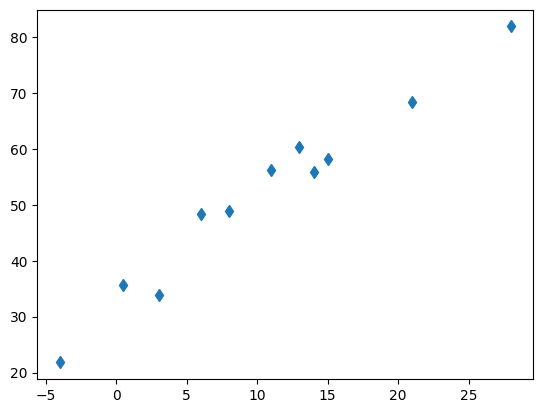

In [10]:
plt.plot(t_c_tor.numpy(), t_f_tor.numpy(), 'd')
plt.show()

## Part1: Inference Function or Model

In [11]:
def model(t_c, w, b):

    return w * t_c + b

## Part2: Loss Function or Optimization Objective

$ J = (y- \hat y)^2 $

$ w = w - (sign)*dw(learningRate) $

In [12]:
## MSE

def loss_fn(y_real, y_pred):

    sqaured_diffs =  (y_real - y_pred) ** 2
    return sqaured_diffs.mean()

## Part3: Training Loop

In [119]:
list_epochs = []
list_loss = []

def training_loop(n_epochs, optimizer, params, t_c_tor, t_f_tor):
    
    for epoch in range(0, n_epochs):

        y_pred = model(t_c_tor, *params)
        loss = loss_fn(t_f_tor, y_pred)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        list_epochs.append(epoch)
        list_loss.append(loss.detach().numpy())
        print(loss)

In [135]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([params],lr = learning_rate)

In [136]:
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_c_tor = t_c_tor,
    t_f_tor = t_f_tor
)

tensor(1763.8848, grad_fn=<MeanBackward0>)
tensor(963.1029, grad_fn=<MeanBackward0>)
tensor(650.8063, grad_fn=<MeanBackward0>)
tensor(528.7443, grad_fn=<MeanBackward0>)
tensor(480.7671, grad_fn=<MeanBackward0>)
tensor(461.6418, grad_fn=<MeanBackward0>)
tensor(453.7534, grad_fn=<MeanBackward0>)
tensor(450.2415, grad_fn=<MeanBackward0>)
tensor(448.4349, grad_fn=<MeanBackward0>)
tensor(447.2932, grad_fn=<MeanBackward0>)
tensor(446.4109, grad_fn=<MeanBackward0>)
tensor(445.6304, grad_fn=<MeanBackward0>)
tensor(444.8903, grad_fn=<MeanBackward0>)
tensor(444.1667, grad_fn=<MeanBackward0>)
tensor(443.4502, grad_fn=<MeanBackward0>)
tensor(442.7373, grad_fn=<MeanBackward0>)
tensor(442.0263, grad_fn=<MeanBackward0>)
tensor(441.3168, grad_fn=<MeanBackward0>)
tensor(440.6088, grad_fn=<MeanBackward0>)
tensor(439.9017, grad_fn=<MeanBackward0>)
tensor(439.1960, grad_fn=<MeanBackward0>)
tensor(438.4915, grad_fn=<MeanBackward0>)
tensor(437.7881, grad_fn=<MeanBackward0>)
tensor(437.0858, grad_fn=<MeanBac

In [137]:
params

tensor([ 1.8227, 32.4397], requires_grad=True)

In [138]:
x = -40
y = model(x, *params)
y

tensor(-40.4674, grad_fn=<AddBackward0>)

<function matplotlib.pyplot.show(close=None, block=None)>

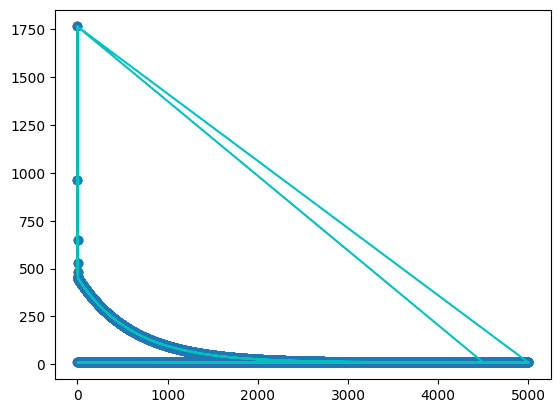

In [142]:
plt.plot(list_epochs, list_loss, 'c')
plt.scatter(list_epochs, list_loss)
plt.show